## 데이콘 Basic 여행 상품 신청 여부 예측 경진대회

### 변수 정보

### 1. train.csv : 학습 데이터

* id : 샘플 아이디
* Age : 나이
* TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
* CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
* DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
* Occupation : 직업
* Gender : 성별
* NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
* NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
* ProductPitched : 영업 사원이 제시한 상품
* PreferredPropertyStar : 선호 호텔 숙박업소 등급
* MaritalStatus : 결혼여부
* NumberOfTrips : 평균 연간 여행 횟수
* Passport : 여권 보유 여부 (0: 없음, 1: 있음)
* PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
* OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
* NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
* Designation : (직업의) 직급
* MonthlyIncome : 월 급여
* ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# train 데이터 불러오기

train = pd.read_csv('train.csv')
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


### 1. 중복 데이터

In [5]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1950    False
1951    False
1952    False
1953    False
1954    False
Length: 1955, dtype: bool

In [7]:
# 중복 데이터 없음

train[train.duplicated()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


### 2. 결측치

In [8]:
# 결측치 확인

train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [9]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [ ]:
# 결측치

Age(나이)  94
TypeofContact(고객의 제품 인지 방법)  10
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  102
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  13
PreferredPropertyStar(선호 호텔 숙박업소 등급)  10
NumberOfTrips(평균 여간 여행 횟수)  57
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  27
MonthlyIncome(월 급여)  100

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [ ]:
# 연속형

Age(나이)  94
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  102
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  13
PreferredPropertyStar(선호 호텔 숙박업소 등급)  10
NumberOfTrips(평균 여간 여행 횟수)  57
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  27
MonthlyIncome(월 급여)  100

In [ ]:
# 범주형

TypeofContact(고객의 제품 인지 방법)  10

In [ ]:
## 범주형 데이터의 결측치는 삭제
## 수치형 데이터의 결측치는 중간값이나 평균으로 대체하거나, 0으로 대체

### 3. 이상치

In [12]:
# 컬럼명 출력

train.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

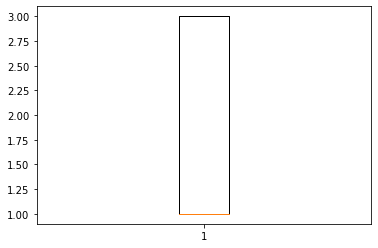

In [18]:
# 박스플롯
## 범주형, 결측치 존재 변수 제외

fig, ax = plt.subplots()
ax.boxplot(train.CityTier)
plt.show()

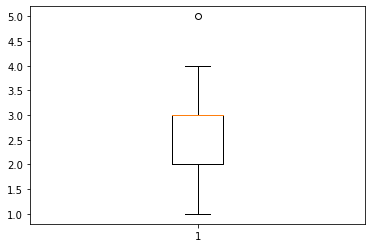

In [19]:
# 이상치 존재
## 고객과 함께 여행을 계획 중인 총 인원

fig, ax = plt.subplots()
ax.boxplot(train.NumberOfPersonVisiting)
plt.show()

In [24]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
  
    
    # 이상치 존재 행
    return np.where((data[column]>upper)|(data[column]<lower))

In [27]:
outlier_iqr(train, 'NumberOfPersonVisiting')

IQR은 1.0 이다.
lower bound 값은 0.5 이다.
upper bound 값은 4.5 이다.


(array([408], dtype=int64),)

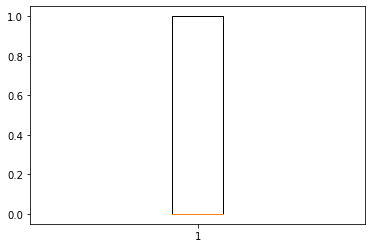

In [20]:
fig, ax = plt.subplots()
ax.boxplot(train.Passport)
plt.show()

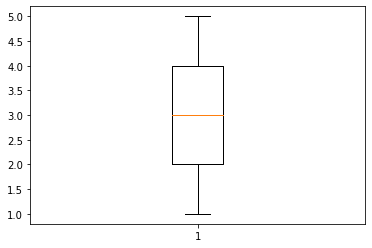

In [21]:
fig, ax = plt.subplots()
ax.boxplot(train.PitchSatisfactionScore)
plt.show()

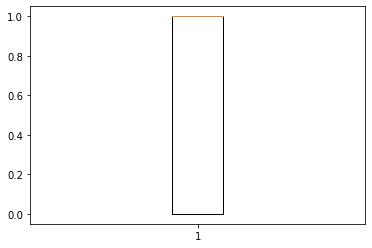

In [22]:
fig, ax = plt.subplots()
ax.boxplot(train.OwnCar)
plt.show()

### 상관관계

In [33]:
train.corr()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
id,1.000000,0.006332,-0.022072,0.002178,0.036337,-0.010110,-0.011251,0.041546,0.009294,-0.040459,-0.013982,0.028112,0.032920,-0.048933
Age,0.006332,1.000000,0.007875,0.025779,0.010795,0.009834,-0.026789,0.178143,0.030162,0.032860,0.060298,0.039495,0.440733,-0.135832
CityTier,-0.022072,0.007875,1.000000,0.056010,0.018071,0.023532,-0.011882,-0.020887,0.013665,-0.028168,0.014177,0.025359,0.057705,0.085583
DurationOfPitch,0.002178,0.025779,0.056010,1.000000,0.096268,0.039485,-0.004448,0.022236,0.043478,0.011926,-0.015087,0.047770,0.016011,0.072899
NumberOfPersonVisiting,0.036337,0.010795,0.018071,0.096268,1.000000,0.333738,0.017057,0.214895,0.023638,-0.012981,0.018545,0.610193,0.168701,0.006483
NumberOfFollowups,-0.010110,0.009834,0.023532,0.039485,0.333738,1.000000,-0.049151,0.135183,-0.005332,-0.007195,0.051920,0.293942,0.194668,0.105038
PreferredPropertyStar,-0.011251,-0.026789,-0.011882,-0.004448,0.017057,-0.049151,1.000000,0.035064,0.014701,-0.019620,0.031355,0.027038,-0.024338,0.114923
NumberOfTrips,0.041546,0.178143,-0.020887,0.022236,0.214895,0.135183,0.035064,1.000000,0.004418,0.034816,0.005982,0.189517,0.137093,0.044922
Passport,0.009294,0.030162,0.013665,0.043478,0.023638,-0.005332,0.014701,0.004418,1.000000,0.018526,-0.045133,0.030512,0.017044,0.293726
PitchSatisfactionScore,-0.040459,0.032860,-0.028168,0.011926,-0.012981,-0.007195,-0.019620,0.034816,0.018526,1.000000,0.073097,0.023842,-0.005497,0.067736


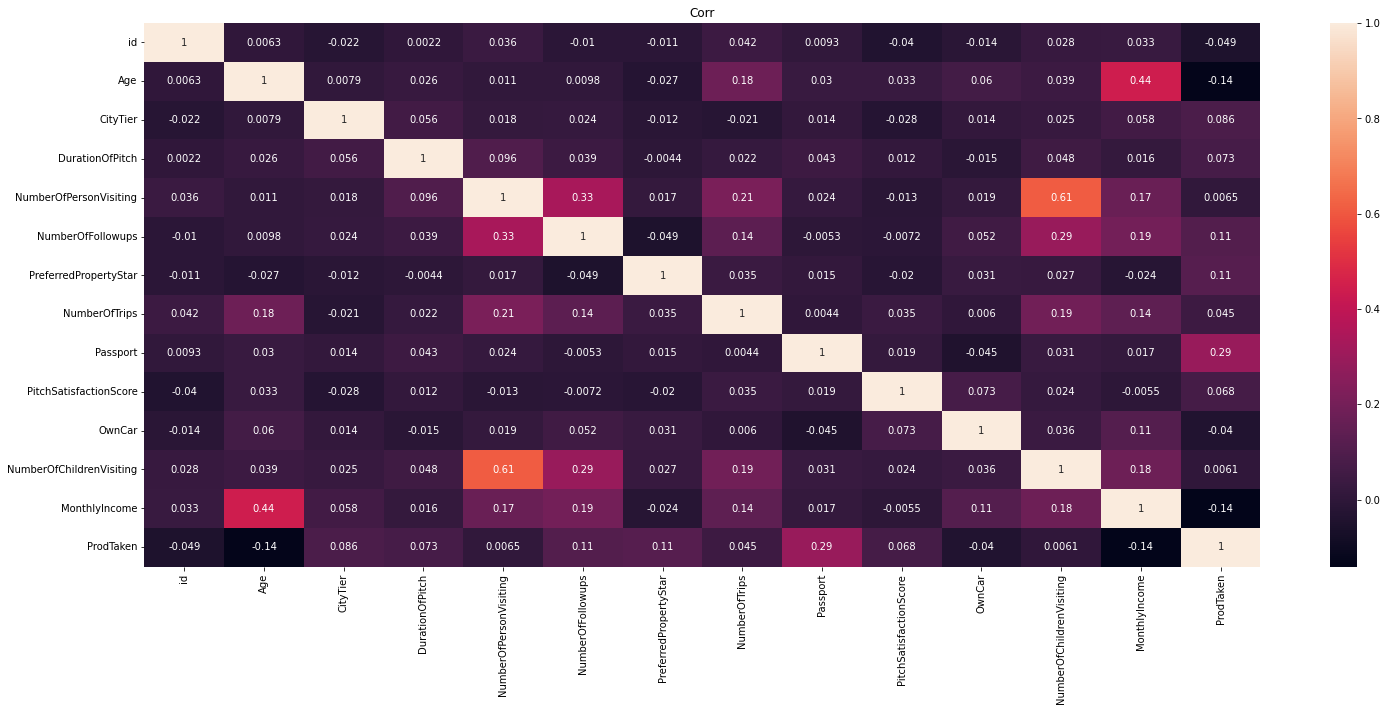

In [32]:
import seaborn as sns

plt.figure(figsize=(25,10))
plt.title('Corr')
sns.heatmap(train.corr(), annot=True);